In [33]:
#import stuff that needed
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#knobs
BATCH_SIZE = 4
EPOCHS = 20
IMG_SIZE = (150, 150)
IMG_SHAPE = (150, 150, 3)

In [36]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Dataset/supermini.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [37]:
base_dir = '/tmp/supermini'

In [38]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [39]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'binary',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'binary',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

Found 204 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [40]:
TRAIN_SIZE = train_generator.n
TEST_SIZE = test_generator.n

In [41]:
model = Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [43]:
history = model.fit(
    train_generator,
    epochs = EPOCHS,
    steps_per_epoch = TRAIN_SIZE // BATCH_SIZE,
    validation_data = test_generator,
    validation_steps = TEST_SIZE // BATCH_SIZE
)

Epoch 1/20
51/51 [==============================] - 8s 41ms/step - loss: 0.7050 - accuracy: 0.5228 - val_loss: 0.6346 - val_accuracy: 0.6250
Epoch 2/20
51/51 [==============================] - 1s 29ms/step - loss: 0.5422 - accuracy: 0.7832 - val_loss: 0.3739 - val_accuracy: 0.8125
Epoch 3/20
51/51 [==============================] - 1s 29ms/step - loss: 0.2926 - accuracy: 0.8920 - val_loss: 0.3480 - val_accuracy: 0.9167
Epoch 4/20
51/51 [==============================] - 1s 29ms/step - loss: 0.3422 - accuracy: 0.8679 - val_loss: 0.2281 - val_accuracy: 0.9167
Epoch 5/20
51/51 [==============================] - 1s 28ms/step - loss: 0.2693 - accuracy: 0.8644 - val_loss: 0.2942 - val_accuracy: 0.9167
Epoch 6/20
51/51 [==============================] - 1s 29ms/step - loss: 0.1691 - accuracy: 0.9642 - val_loss: 0.9167 - val_accuracy: 0.7708
Epoch 7/20
51/51 [==============================] - 1s 29ms/step - loss: 0.4435 - accuracy: 0.8808 - val_loss: 0.2932 - val_accuracy: 0.8333
Epoch 8/20
51

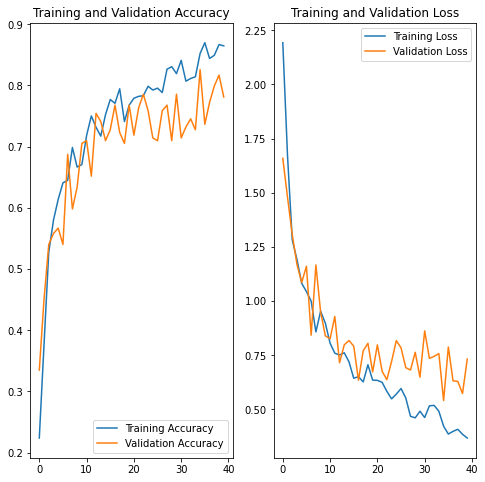

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving jer9.jpg to jer9.jpg
jer9.jpg
Jeruk


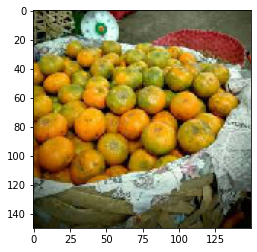

In [56]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('Appel')
  else:
    print('Jeruk')

In [59]:
export_dir = 'saved_model-fromscratch'

model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


In [61]:
!zip -r /content/saved_model-fromscratch.zip /content/saved_model-fromscratch

  adding: content/saved_model-fromscratch/ (stored 0%)
  adding: content/saved_model-fromscratch/assets/ (stored 0%)
  adding: content/saved_model-fromscratch/keras_metadata.pb (deflated 86%)
  adding: content/saved_model-fromscratch/saved_model.pb (deflated 90%)
  adding: content/saved_model-fromscratch/variables/ (stored 0%)
  adding: content/saved_model-fromscratch/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: content/saved_model-fromscratch/variables/variables.index (deflated 67%)


In [63]:
from google.colab import files
files.download("/content/saved_model-fromscratch.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>